In [47]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [48]:
# Load the dataset (assuming it's stored in a file)
data = pd.read_csv('heart.csv')

In [49]:
# Separate features and labels
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=5000, random_state=42)
training_loss = mlp.fit(X_train, y_train).loss_curve_

In [53]:
# Make predictions on the testing set
y_pred = mlp.predict(X_test)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

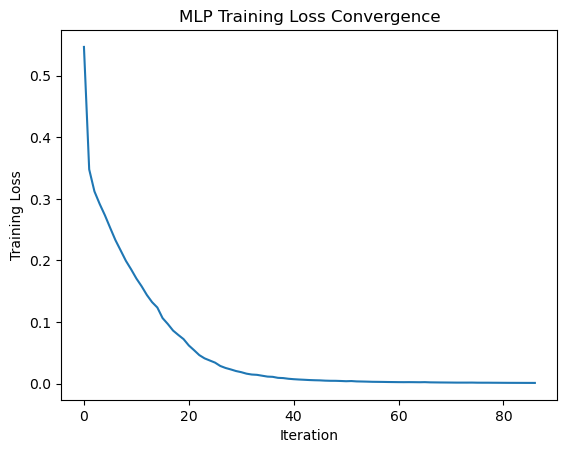

In [55]:
# Plot the error convergence
plt.plot(training_loss)
plt.title("MLP Training Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.show()

In [56]:
# Print the results
print(f"Accuracy: {accuracy}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9853658536585366

Confusion Matrix:
[[102   0]
 [  3 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

